In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from time import time
import os
tf.__version__

'2.1.0'

In [2]:
def load_mnist():
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    
    import matplotlib.pyplot as plt

    plt.figure()
    plt.imshow(train_data[0])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    train_data = np.expand_dims(train_data, axis=-1)
    test_data = np.expand_dims(test_data, axis=-1)
    
    train_data, test_data = normalization(train_data, test_data)
    
    train_labels = to_categorical(train_labels, 10)
    test_labels = to_categorical(test_labels, 10)
    
    return train_data, test_data, train_labels, test_labels

def normalization(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0
    return train_data, test_data

In [3]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, from_logits=True))

def accuracy_fn(model, images, labels):
    logits = model(images, training=True)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    return tf.reduce_mean(tf.cast(prediction, dtype=tf.float32))

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [4]:
def flatten():
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init):
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu():
    return tf.keras.layers.Activation(tf.keras.activations.relu)

In [5]:
class create_model(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model, self).__init__()
        weight_init = tf.keras.initializers.he_uniform()
        
        self.model = tf.keras.Sequential()
        self.model.add(flatten())
        
        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(relu())
        
        self.model.add(dense(label_dim, weight_init))
    
    def call(self, x, training=None, mask=None):
        x = self.model(x)
        return x

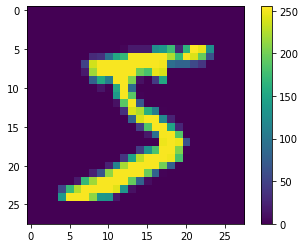

In [6]:
train_x, test_x, train_labels, test_labels = load_mnist()

learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_labels)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_labels)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

In [7]:
network = create_model(label_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [8]:
for idx, (train_input, train_label) in enumerate(train_dataset):                
    grads = grad(network, train_input, train_label)
    optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

    train_loss = loss_fn(network, train_input, train_label)
    train_accuracy = accuracy_fn(network, train_input, train_label)

    for test_input, test_label in test_dataset:                
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print(
        "Epoch: [%2d] [%5d/%5d], train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
        % (0, idx, training_iterations, train_loss, train_accuracy, test_accuracy))

Epoch: [ 0] [    0/  468], train_loss: 1.97733891, train_accuracy: 0.3672, test_Accuracy: 0.2610
Epoch: [ 0] [    1/  468], train_loss: 1.91476274, train_accuracy: 0.4375, test_Accuracy: 0.3390
Epoch: [ 0] [    2/  468], train_loss: 1.83646989, train_accuracy: 0.4688, test_Accuracy: 0.5087
Epoch: [ 0] [    3/  468], train_loss: 1.64225483, train_accuracy: 0.6406, test_Accuracy: 0.6581
Epoch: [ 0] [    4/  468], train_loss: 1.47833943, train_accuracy: 0.7188, test_Accuracy: 0.7130
Epoch: [ 0] [    5/  468], train_loss: 1.26691020, train_accuracy: 0.7344, test_Accuracy: 0.7170
Epoch: [ 0] [    6/  468], train_loss: 1.18021655, train_accuracy: 0.7578, test_Accuracy: 0.7101
Epoch: [ 0] [    7/  468], train_loss: 1.11052954, train_accuracy: 0.7188, test_Accuracy: 0.7275
Epoch: [ 0] [    8/  468], train_loss: 1.10780311, train_accuracy: 0.7656, test_Accuracy: 0.7592
Epoch: [ 0] [    9/  468], train_loss: 0.93121374, train_accuracy: 0.7891, test_Accuracy: 0.7792
Epoch: [ 0] [   10/  468], tra

Epoch: [ 0] [   85/  468], train_loss: 0.27546808, train_accuracy: 0.9219, test_Accuracy: 0.9181
Epoch: [ 0] [   86/  468], train_loss: 0.25750244, train_accuracy: 0.9141, test_Accuracy: 0.9182
Epoch: [ 0] [   87/  468], train_loss: 0.24443573, train_accuracy: 0.9062, test_Accuracy: 0.9212
Epoch: [ 0] [   88/  468], train_loss: 0.20169345, train_accuracy: 0.9375, test_Accuracy: 0.9225
Epoch: [ 0] [   89/  468], train_loss: 0.25849336, train_accuracy: 0.9375, test_Accuracy: 0.9232
Epoch: [ 0] [   90/  468], train_loss: 0.29690608, train_accuracy: 0.9219, test_Accuracy: 0.9239
Epoch: [ 0] [   91/  468], train_loss: 0.26284194, train_accuracy: 0.9219, test_Accuracy: 0.9242
Epoch: [ 0] [   92/  468], train_loss: 0.39939553, train_accuracy: 0.9141, test_Accuracy: 0.9238
Epoch: [ 0] [   93/  468], train_loss: 0.31852102, train_accuracy: 0.9141, test_Accuracy: 0.9255
Epoch: [ 0] [   94/  468], train_loss: 0.21466917, train_accuracy: 0.9297, test_Accuracy: 0.9253
Epoch: [ 0] [   95/  468], tra

Epoch: [ 0] [  170/  468], train_loss: 0.20126635, train_accuracy: 0.9375, test_Accuracy: 0.9370
Epoch: [ 0] [  171/  468], train_loss: 0.29256609, train_accuracy: 0.9062, test_Accuracy: 0.9382
Epoch: [ 0] [  172/  468], train_loss: 0.20733821, train_accuracy: 0.9375, test_Accuracy: 0.9398
Epoch: [ 0] [  173/  468], train_loss: 0.26323202, train_accuracy: 0.9141, test_Accuracy: 0.9419
Epoch: [ 0] [  174/  468], train_loss: 0.26947218, train_accuracy: 0.9297, test_Accuracy: 0.9418
Epoch: [ 0] [  175/  468], train_loss: 0.19604716, train_accuracy: 0.9375, test_Accuracy: 0.9393
Epoch: [ 0] [  176/  468], train_loss: 0.23785084, train_accuracy: 0.9219, test_Accuracy: 0.9385
Epoch: [ 0] [  177/  468], train_loss: 0.18442935, train_accuracy: 0.9297, test_Accuracy: 0.9367
Epoch: [ 0] [  178/  468], train_loss: 0.24306974, train_accuracy: 0.9219, test_Accuracy: 0.9362
Epoch: [ 0] [  179/  468], train_loss: 0.18456493, train_accuracy: 0.9531, test_Accuracy: 0.9396
Epoch: [ 0] [  180/  468], tra

Epoch: [ 0] [  255/  468], train_loss: 0.14171417, train_accuracy: 0.9375, test_Accuracy: 0.9548
Epoch: [ 0] [  256/  468], train_loss: 0.16322909, train_accuracy: 0.9609, test_Accuracy: 0.9539
Epoch: [ 0] [  257/  468], train_loss: 0.11995776, train_accuracy: 0.9531, test_Accuracy: 0.9529
Epoch: [ 0] [  258/  468], train_loss: 0.10483781, train_accuracy: 0.9844, test_Accuracy: 0.9523
Epoch: [ 0] [  259/  468], train_loss: 0.09415622, train_accuracy: 0.9766, test_Accuracy: 0.9521
Epoch: [ 0] [  260/  468], train_loss: 0.10278921, train_accuracy: 0.9766, test_Accuracy: 0.9528
Epoch: [ 0] [  261/  468], train_loss: 0.15220168, train_accuracy: 0.9453, test_Accuracy: 0.9533
Epoch: [ 0] [  262/  468], train_loss: 0.08728948, train_accuracy: 0.9688, test_Accuracy: 0.9538
Epoch: [ 0] [  263/  468], train_loss: 0.15086021, train_accuracy: 0.9453, test_Accuracy: 0.9553
Epoch: [ 0] [  264/  468], train_loss: 0.06551845, train_accuracy: 0.9922, test_Accuracy: 0.9550
Epoch: [ 0] [  265/  468], tra

Epoch: [ 0] [  340/  468], train_loss: 0.09203148, train_accuracy: 0.9688, test_Accuracy: 0.9540
Epoch: [ 0] [  341/  468], train_loss: 0.11904496, train_accuracy: 0.9688, test_Accuracy: 0.9599
Epoch: [ 0] [  342/  468], train_loss: 0.10632510, train_accuracy: 0.9688, test_Accuracy: 0.9595
Epoch: [ 0] [  343/  468], train_loss: 0.09441023, train_accuracy: 0.9766, test_Accuracy: 0.9564
Epoch: [ 0] [  344/  468], train_loss: 0.18068774, train_accuracy: 0.9375, test_Accuracy: 0.9547
Epoch: [ 0] [  345/  468], train_loss: 0.10182076, train_accuracy: 0.9453, test_Accuracy: 0.9536
Epoch: [ 0] [  346/  468], train_loss: 0.08944412, train_accuracy: 0.9531, test_Accuracy: 0.9535
Epoch: [ 0] [  347/  468], train_loss: 0.13343135, train_accuracy: 0.9609, test_Accuracy: 0.9541
Epoch: [ 0] [  348/  468], train_loss: 0.10809053, train_accuracy: 0.9688, test_Accuracy: 0.9546
Epoch: [ 0] [  349/  468], train_loss: 0.13420251, train_accuracy: 0.9609, test_Accuracy: 0.9568
Epoch: [ 0] [  350/  468], tra

Epoch: [ 0] [  425/  468], train_loss: 0.08216731, train_accuracy: 0.9766, test_Accuracy: 0.9610
Epoch: [ 0] [  426/  468], train_loss: 0.08070229, train_accuracy: 0.9766, test_Accuracy: 0.9608
Epoch: [ 0] [  427/  468], train_loss: 0.17035682, train_accuracy: 0.9453, test_Accuracy: 0.9592
Epoch: [ 0] [  428/  468], train_loss: 0.13964492, train_accuracy: 0.9453, test_Accuracy: 0.9610
Epoch: [ 0] [  429/  468], train_loss: 0.08179018, train_accuracy: 0.9688, test_Accuracy: 0.9616
Epoch: [ 0] [  430/  468], train_loss: 0.14579940, train_accuracy: 0.9688, test_Accuracy: 0.9610
Epoch: [ 0] [  431/  468], train_loss: 0.17850229, train_accuracy: 0.9531, test_Accuracy: 0.9618
Epoch: [ 0] [  432/  468], train_loss: 0.14917064, train_accuracy: 0.9609, test_Accuracy: 0.9612
Epoch: [ 0] [  433/  468], train_loss: 0.13816151, train_accuracy: 0.9453, test_Accuracy: 0.9601
Epoch: [ 0] [  434/  468], train_loss: 0.08770229, train_accuracy: 0.9844, test_Accuracy: 0.9603
Epoch: [ 0] [  435/  468], tra

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'train_data' is not defined

<Figure size 432x288 with 0 Axes>